In [273]:
import pandas as pd
import zipfile
import io
data_path = "/Users/emrecavus/Desktop/445_Project/TRAIN_RELEASE_3SEP2025.zip"

In [274]:
columns = {}

with zipfile.ZipFile(data_path, 'r') as z:
    all_files = z.namelist()

    # Filter only TRAIN_RELEASE_3SEP2025 CSVs
    csv_files = [
        f for f in all_files 
        if f.startswith('TRAIN_RELEASE_3SEP2025/') and f.endswith('.csv')
    ]

    for csv_file in csv_files:
        with z.open(csv_file) as f:
            df = pd.read_csv(f)
            # Store the *filename* and its columns
            columns[csv_file] = list(df.columns)

# Print example
for k, v in columns.items():
    print(k, "=>", v)


TRAIN_RELEASE_3SEP2025/train_subtask2b_user_disposition_change.csv => ['user_id', 'disposition_change_valence', 'disposition_change_arousal']
TRAIN_RELEASE_3SEP2025/trial_data.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'text_per_user']
TRAIN_RELEASE_3SEP2025/train_subtask2a.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'state_change_valence', 'state_change_arousal']
TRAIN_RELEASE_3SEP2025/train_subtask2b.csv => ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal', 'group', 'disposition_change_valence', 'disposition_change_arousal']
TRAIN_RELEASE_3SEP2025/train_subtask1.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal']
TRAIN_RELEASE_3SEP2025/train_subtask2b_detailed.csv => ['user_id', 'text_id', 'text', 'timestamp', 'collection_phase', 'is_words', 'valence', 'arousal', 'text_num', 'num_texts_per_user',

In [275]:
# Going with train_subtask1.csv, train_subtask2a.csv, train_subtask2b.csv first
def read_from_zip(zip_path, inner_path):
    with zipfile.ZipFile(zip_path, 'r') as z:
        with z.open(inner_path) as f:
            return pd.read_csv(f)

df1 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask1.csv")
df2 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask2a.csv")
df3 = read_from_zip(data_path, "TRAIN_RELEASE_3SEP2025/train_subtask2b.csv")


In [276]:
df1.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0


In [277]:
df2.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,1,False,2.0,1.0,0.0,0.0
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,1,False,2.0,1.0,-2.0,0.0
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,1,False,0.0,1.0,2.0,0.0
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,1,False,2.0,1.0,0.0,1.0
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,1,False,2.0,2.0,NaN,NaN


In [278]:
df3.head()

,user_id,text_id,text,timestamp,valence,arousal,group,disposition_change_valence,disposition_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,2.0,1.0,1,0.666667,0.5
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,2.0,1.0,1,0.666667,0.5
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,0.0,1.0,1,0.666667,0.5
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,2.0,1.0,2,0.666667,0.5
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,2.0,2.0,2,0.666667,0.5


In [279]:
print(f"Length of DF1: {len(df1)}")
print(f"Length of DF2: {len(df2)}")
print(f"Length of DF3: {len(df3)}")

Length of DF1: 2764
Length of DF2: 2764
Length of DF3: 2764


In [280]:
df1["user_id"].describe()

count    2764.000000
mean       75.847323
std        54.044222
min         1.000000
25%        33.000000
50%        63.000000
75%       124.000000
max       182.000000
Name: user_id, dtype: float64

In [281]:
df2["user_id"].describe()

count    2764.000000
mean       75.847323
std        54.044222
min         1.000000
25%        33.000000
50%        63.000000
75%       124.000000
max       182.000000
Name: user_id, dtype: float64

In [282]:
# Same user id's and text id's are included in all three dataframes. So, we can combine them under the same dataframe
# Common fields in all of the dataframes = user_id, text_id, text, timestamp, valence, arousal
# So, we can concatanate on these fields 

In [283]:
# Concatting df1 and df2 on their common fields
df1 = pd.merge(df1, df2, on = ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal', 'is_words', 'collection_phase'], how = 'left')

In [284]:
df1.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0,-1.0,0.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0,1.0,0.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0,0.0,0.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0,1.0,0.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0,NaN,NaN


In [285]:
# Concatting resultant df1 and df3 on their common fields
df1 = pd.merge(df1, df3, on = ['user_id', 'text_id', 'text', 'timestamp', 'valence', 'arousal'], how = 'left')

In [286]:
df3.head()

,user_id,text_id,text,timestamp,valence,arousal,group,disposition_change_valence,disposition_change_arousal
0,1,200,I feel good . I caught up on some sleep . Wo...,2021-06-09 12:41:57,2.0,1.0,1,0.666667,0.5
1,1,201,I’ve been feeling good for days and days . I r...,2021-06-11 12:01:45,2.0,1.0,1,0.666667,0.5
2,1,202,I’ve been feeling fine personally . I’ve been ...,2021-06-13 13:15:07,0.0,1.0,1,0.666667,0.5
3,1,203,I feel great . I’ve had a day off . I’m going ...,2021-06-16 12:03:12,2.0,1.0,2,0.666667,0.5
4,1,204,I feel great today . I am well rested . I have...,2021-06-17 12:38:38,2.0,2.0,2,0.666667,0.5


In [287]:
# Finally creating the dataframe to be used
df = df1.copy()

In [288]:
df.head()

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal,group,disposition_change_valence,disposition_change_arousal
0,3,251,I ' ve been feeling just fine . Nice and relax...,2021-06-08 12:26:16,1,False,1.0,1.0,-1.0,0.0,1,0.833333,0.0
1,3,252,I ' ve been feeling pretty good . This is my l...,2021-06-09 13:41:40,1,False,0.0,1.0,1.0,0.0,1,0.833333,0.0
2,3,253,Still feeling sick today and sneezing alot wit...,2021-06-11 15:13:48,1,False,1.0,1.0,0.0,0.0,1,0.833333,0.0
3,3,254,I ' m still feeling kinda sickly but I powered...,2021-06-12 12:20:03,1,False,1.0,1.0,1.0,0.0,2,0.833333,0.0
4,3,255,I ' m feeling so much better today ! Seems lik...,2021-06-13 14:54:41,1,False,2.0,1.0,NaN,NaN,2,0.833333,0.0


In [289]:
# Detecting any null or very short texts
print(f"Size of Dataset before cleaning: {df.shape[0]}")
def clean_text(df: pd.DataFrame):
    df = df.dropna(subset=['text'])                      
    df = df[df['text'].str.len() >= 2]                   
    return df.reset_index(drop=True)


df = clean_text(df)
print(f"Size of Dataset after cleaning: {df.shape[0]}")

Size of Dataset before cleaning: 2764
Size of Dataset after cleaning: 2764


In [290]:
# Exploratory Data Analysis Part
import matplotlib.pyplot as plt
import seaborn as sns

In [291]:
# Seeing the distributions of valence and arousal
df['valence'].describe()

count    2764.000000
mean        0.216715
std         1.292142
min        -2.000000
25%        -1.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: valence, dtype: float64

In [292]:
df['arousal'].describe()

count    2764.000000
mean        0.751085
std         0.753985
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: arousal, dtype: float64

In [293]:
# As they are both categorical variables, going with bar charts

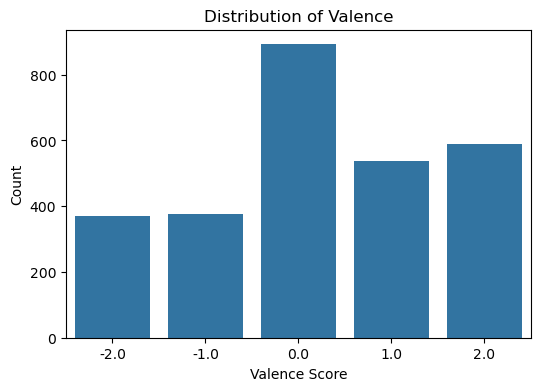

In [294]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['valence'], order=sorted(df['valence'].unique()))
plt.title("Distribution of Valence")
plt.xlabel("Valence Score")
plt.ylabel("Count")
plt.show()

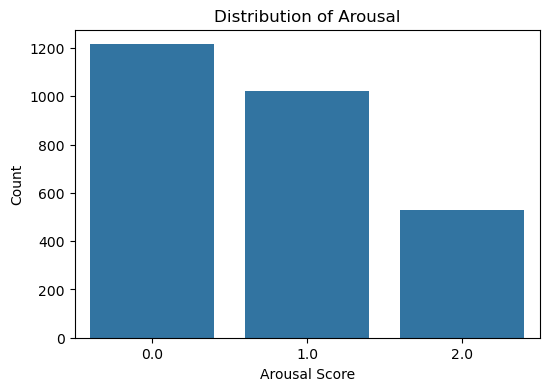

In [295]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['arousal'], order=sorted(df['arousal'].unique()))
plt.title("Distribution of Arousal")
plt.xlabel("Arousal Score")
plt.ylabel("Count")
plt.show()

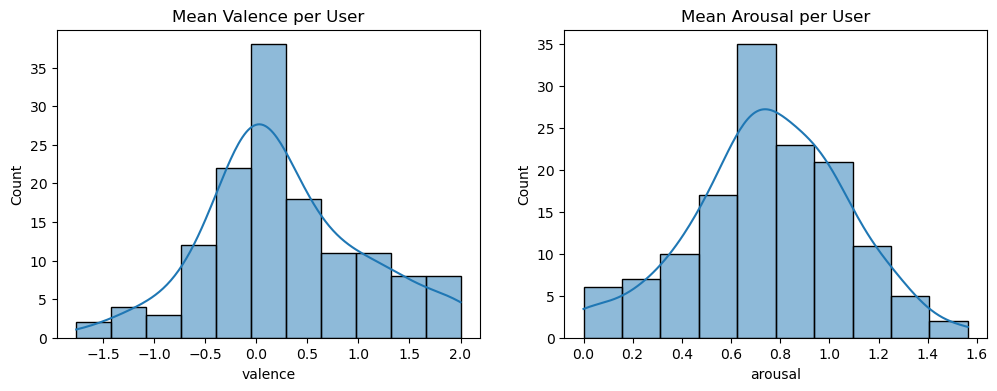

In [296]:
# Computing user level means for valence and arousal
user_stats = df.groupby("user_id")[["valence", "arousal"]].mean()

fig, ax = plt.subplots(1, 2, figsize=(12,4))

sns.histplot(user_stats['valence'], kde=True, ax=ax[0])
ax[0].set_title("Mean Valence per User")

sns.histplot(user_stats['arousal'], kde=True, ax=ax[1])
ax[1].set_title("Mean Arousal per User")

plt.show()

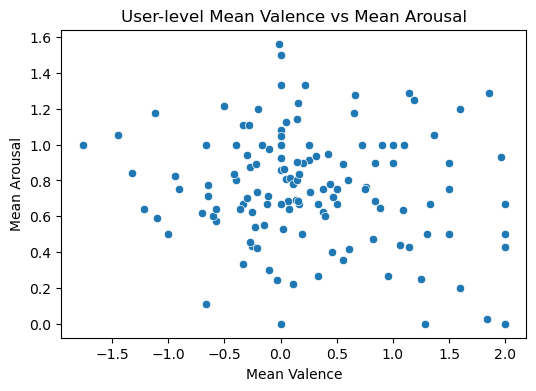

In [297]:
# The relationship between mean valence and mean arousal
plt.figure(figsize=(6,4))
sns.scatterplot(x=user_stats['valence'], y=user_stats['arousal'])
plt.title("User-level Mean Valence vs Mean Arousal")
plt.xlabel("Mean Valence")
plt.ylabel("Mean Arousal")
plt.show()

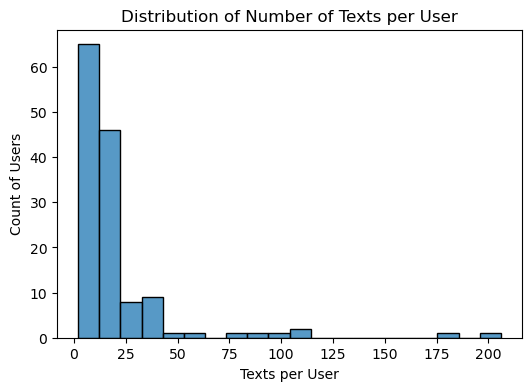

In [298]:
# Computing the numer of texts per user
texts_per_user = df['user_id'].value_counts()

plt.figure(figsize=(6,4))
sns.histplot(texts_per_user, bins=20, kde=False)
plt.title("Distribution of Number of Texts per User")
plt.xlabel("Texts per User")
plt.ylabel("Count of Users")
plt.show()


In [299]:
df.columns

Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'is_words', 'valence', 'arousal', 'state_change_valence',
       'state_change_arousal', 'group', 'disposition_change_valence',
       'disposition_change_arousal'],
      dtype='object')

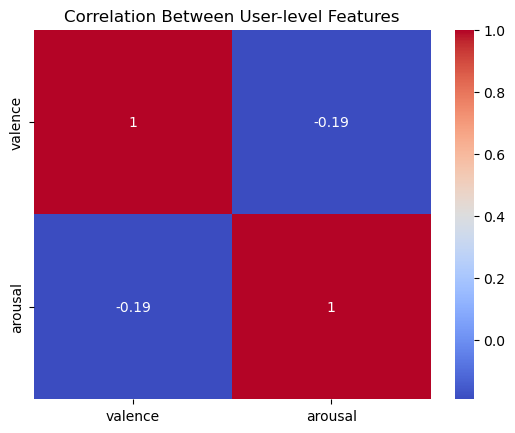

In [300]:
# Correlation matrix between valence and arousal
corr = user_stats.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between User-level Features")
plt.show()


<Axes: xlabel='collection_phase', ylabel='valence'>

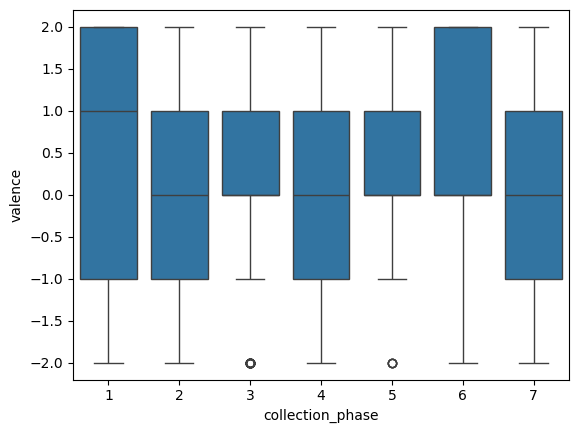

In [301]:
# Distributions of arousal and valence among the collection phases
sns.boxplot(x='collection_phase', y='valence', data=df)


<Axes: xlabel='collection_phase', ylabel='arousal'>

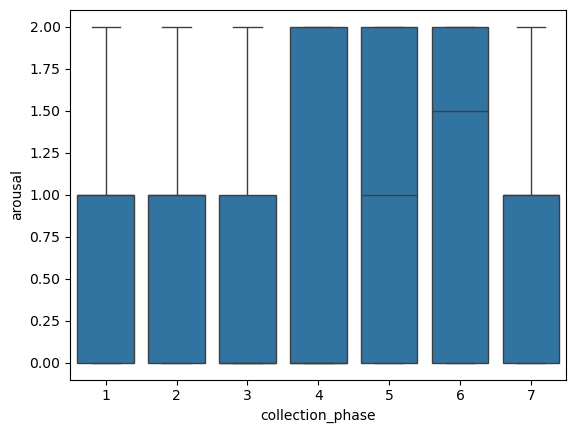

In [302]:
sns.boxplot(x='collection_phase', y='arousal', data=df)

<Axes: xlabel='is_words', ylabel='valence'>

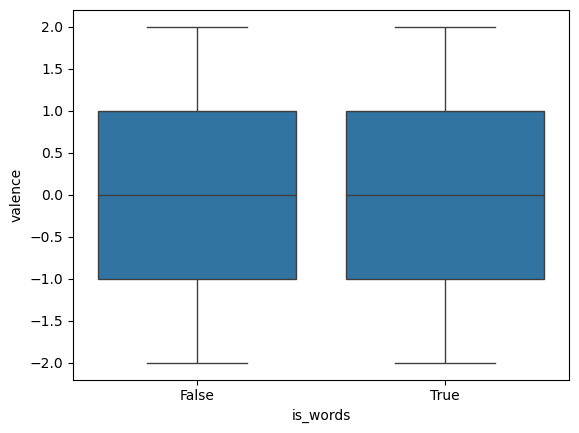

In [303]:
# Distributions of arousal and valence among the essays and feeling words
sns.boxplot(x='is_words', y='valence', data=df)

<Axes: xlabel='is_words', ylabel='arousal'>

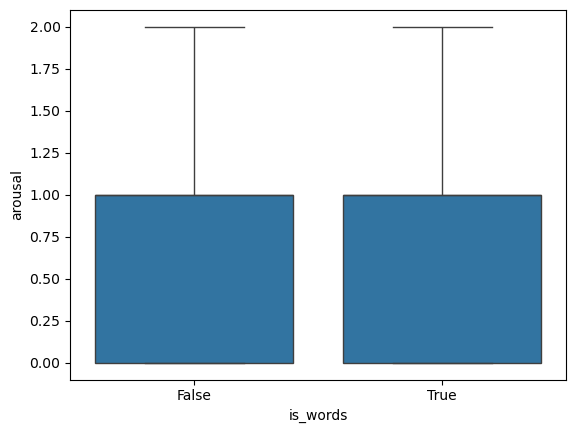

In [304]:
sns.boxplot(x='is_words', y='arousal', data=df)

In [305]:
# Analyzing the timestamp to see the time effects
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.dayofweek

<Axes: xlabel='hour', ylabel='valence'>

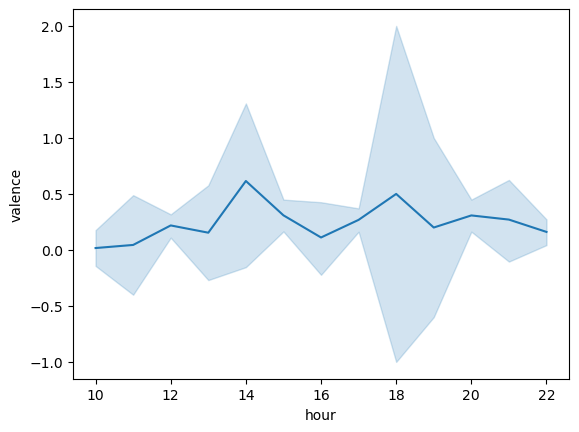

In [306]:
sns.lineplot(x='hour', y='valence', data=df)

<Axes: xlabel='weekday', ylabel='valence'>

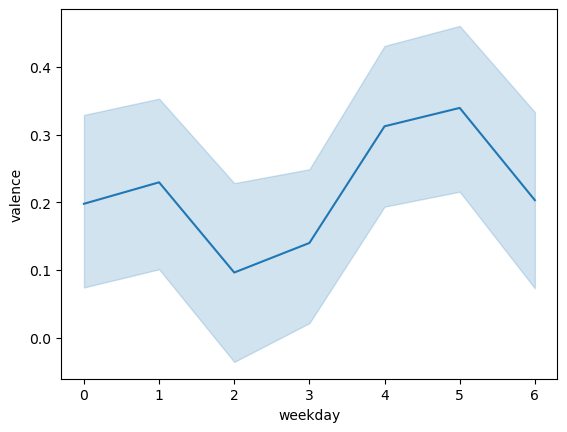

In [307]:
sns.lineplot(x='weekday', y='valence', data=df)

<Axes: xlabel='hour', ylabel='arousal'>

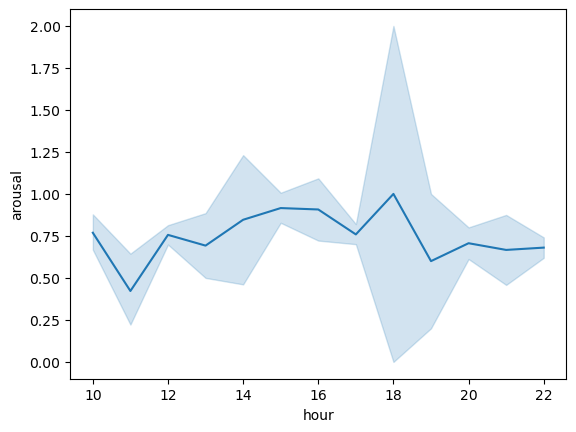

In [308]:
sns.lineplot(x='hour', y='arousal', data=df)

<Axes: xlabel='weekday', ylabel='arousal'>

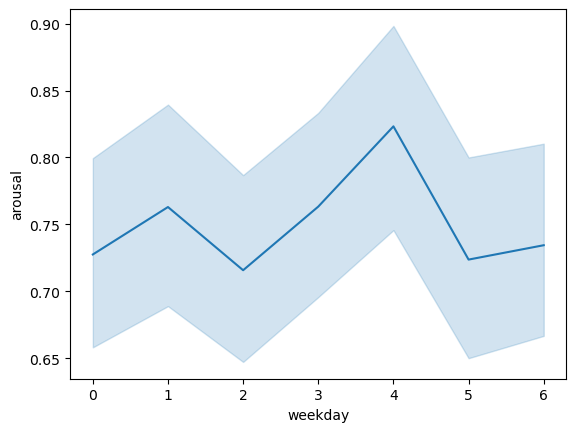

In [309]:
sns.lineplot(x='weekday', y='arousal', data=df)

<Axes: xlabel='group', ylabel='valence'>

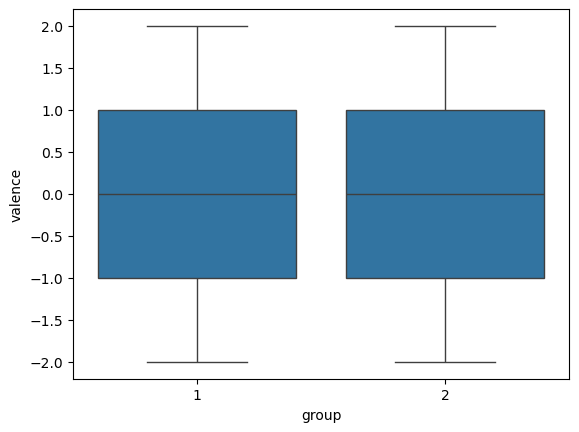

In [310]:
sns.boxplot(x='group', y='valence', data=df)

<Axes: xlabel='group', ylabel='arousal'>

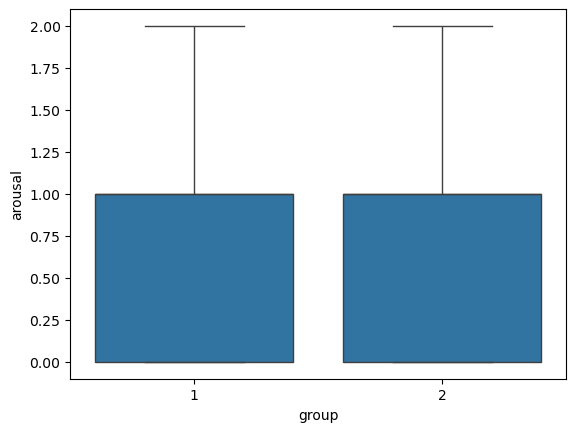

In [311]:
sns.boxplot(x='group', y='arousal', data=df)

In [312]:
# Text length vs emotion
df['text_len'] = df['text'].str.split().str.len()

<Axes: xlabel='text_len', ylabel='valence'>

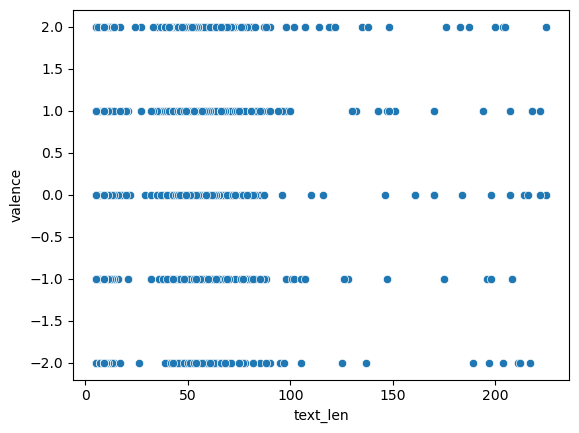

In [313]:
sns.scatterplot(x='text_len', y='valence', data=df)

<Axes: xlabel='lex_sent', ylabel='valence'>

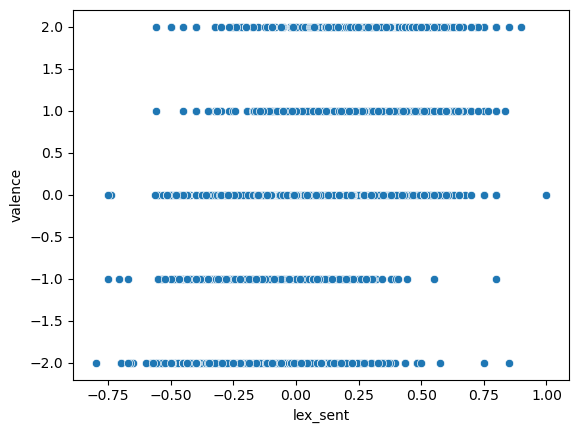

In [314]:
# Sentiment lexicon analysis
from textblob import TextBlob
df['lex_sent'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.scatterplot(x='lex_sent', y='valence', data=df)

In [315]:
df.sample(5)

,user_id,text_id,text,timestamp,collection_phase,is_words,valence,arousal,state_change_valence,state_change_arousal,group,disposition_change_valence,disposition_change_arousal,hour,weekday,text_len,lex_sent
329,67,4797,I ' m feeling excited because I am playing som...,2024-11-02 22:17:52,7,False,2.0,0.0,-2.0,1.0,1,-1.050000,-0.300000,22,5,46,0.175000
803,16,824,"Tired , Unappreciated , Lonely",2021-05-06 12:03:49,1,True,1.0,0.0,-1.0,1.0,1,0.236842,-0.342105,12,3,5,-0.250000
177,33,2130,I just do not feel good today so I feel very s...,2022-01-31 15:03:32,2,False,-2.0,0.0,2.0,1.0,1,-0.629630,-0.018519,15,0,60,0.340000
2193,172,4410,I ' m feeling quite exhausted lately . After t...,2024-10-26 22:45:12,7,False,-2.0,0.0,3.0,1.0,1,-0.277778,0.166667,22,5,189,-0.033333
994,38,2710,"tired , bored , lonely , lazy , sad",2022-02-04 20:01:28,2,True,0.0,1.0,1.0,-1.0,1,0.015731,-0.149235,20,4,9,-0.350000


In [316]:
df.columns

Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'is_words', 'valence', 'arousal', 'state_change_valence',
       'state_change_arousal', 'group', 'disposition_change_valence',
       'disposition_change_arousal', 'hour', 'weekday', 'text_len',
       'lex_sent'],
      dtype='object')

In [317]:
# We will eliminate the features that failed to explain variance in valence and arousal 
cols_to_be_dropped = ['is_words', 'group', 'text_len', 'lex_sent', 'hour']
df = df.drop(columns=cols_to_be_dropped)

In [318]:
df.sample(5)

,user_id,text_id,text,timestamp,collection_phase,valence,arousal,state_change_valence,state_change_arousal,disposition_change_valence,disposition_change_arousal,weekday
114,17,1088,"I am feeling good . Just got to work , and I a...",2022-09-06 15:40:17,4,2.0,0.0,0.0,0.0,0.084906,0.007620,1
1197,88,401,"unwell , tired , hurt , lazy , impatient",2024-11-09 17:06:25,7,-2.0,0.0,1.0,0.0,0.625000,-0.125000,5
1158,76,5084,I ' m feeling incredibly happy and uplifted to...,2024-11-21 17:08:50,7,1.0,1.0,-1.0,-1.0,0.255556,-0.533333,3
576,147,3735,I am feeling just okay I went for a walk with ...,2024-10-15 17:09:50,7,0.0,1.0,1.0,-1.0,-0.081818,0.181818,1
1516,182,4642,"Curious , Spirited , Grateful , Content , Lucky",2024-06-13 12:02:49,7,1.0,2.0,-3.0,-2.0,0.333333,-0.333333,3


In [319]:
df.columns

Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'valence', 'arousal', 'state_change_valence', 'state_change_arousal',
       'disposition_change_valence', 'disposition_change_arousal', 'weekday'],
      dtype='object')

In [320]:
# Going on with the text preprocessing
import re
from nltk.corpus import stopwords

# Keeping stopwords that can affect performance
base_stopwords = set(stopwords.words("english"))
emotional_words_to_keep = {
    "not", "no", "nor", "very", "so", "too", "just", "only", "over", "under", 
    "up", "down", "off", "on", "i", "me", "my", "you", "your"
}

safe_stopwords = base_stopwords - emotional_words_to_keep

def clean_and_tokenize(df: pd.DataFrame) -> pd.DataFrame:
    df = df.dropna(subset=['text']).copy()
    df['text'] = df['text'].astype(str).str.strip()
    df = df[df['text'].str.len() > 0]

    def tokenize(s: str):
        s = s.lower()
        s = re.sub(r"[^\w\s']", " ", s)
        s = re.sub(r"\s+'+\s+", " ", s)
        s = re.sub(r"\s+", " ", s).strip()

        # Tokenize
        tokens = s.split()

        # Remove apostrophe-only tokens
        tokens = [t for t in tokens if t.strip("'") != ""]

        # Remove stopwords using the *safe* stopword list
        tokens = [t for t in tokens if t not in safe_stopwords]

        return tokens

    df['tokens'] = df['text'].apply(tokenize)
    df = df[df['tokens'].str.len() > 0]

    return df.reset_index(drop=True)

print(f"Size of dataframe before: {df.shape[0]}")
df = clean_and_tokenize(df)
print(f"Size of dataframe after: {df.shape[0]}")

Size of dataframe before: 2764
Size of dataframe after: 2764


In [321]:
print(safe_stopwords)

{'which', "it'll", "should've", 'ourselves', 'd', 'both', 'should', 'herself', 'shan', "she's", 'after', 'other', "i'm", 'hasn', "we're", 'whom', 'if', 'it', 'we', 'now', 'most', 'where', 'between', "we'd", 'for', 'such', 'by', 'can', 'each', 'but', 'did', 'be', "i'd", 'theirs', "you'd", 'or', "wasn't", 'don', 's', 'before', 'into', 'being', 'all', 'when', 'against', 'more', 'some', 've', 'our', 'won', 'yourself', "she'll", "couldn't", 'didn', 'mustn', 'because', 'through', "hadn't", "he's", 'is', 'her', "needn't", 'shouldn', "don't", 'any', "mustn't", 'there', "shan't", "it'd", "aren't", 'yours', "hasn't", "that'll", 'couldn', 'hadn', 'has', "you've", 'until', 'here', 'and', 'haven', 'isn', 'are', 'y', 'that', "they've", 'this', 'ma', 'hers', 'ain', "isn't", 'doing', 'needn', "she'd", 'he', 'its', "haven't", 'these', "i've", 'does', 'doesn', 'him', 'why', 'them', 'was', "i'll", 'a', 'the', 'o', 'above', 'to', 'been', 'about', 'mightn', 'she', 'than', 'themselves', 'weren', 'of', 'thei

In [322]:
df.iloc[0]["tokens"]

['i',
 'feeling',
 'just',
 'fine',
 'nice',
 'relaxed',
 'im',
 'on',
 'my',
 'days',
 'off',
 'work',
 'spending',
 'time',
 'my',
 'daughters',
 'home',
 'i',
 'not',
 'sure',
 'else',
 'say',
 'i',
 'good',
 'mood']

In [323]:
# Splitting the dataframe into train, validation, and test sets
# Grouping the texts by users, then splitting
def temporal_train_val_test_split(df):
    df = df.sort_values(['user_id', 'timestamp']).reset_index(drop=True)

    train_list, val_list, test_list = [], [], []

    for user_id, user_df in df.groupby('user_id'):
        n = len(user_df)
        train_end = int(0.7 * n)
        val_end   = int(0.85 * n)

        train_list.append(user_df.iloc[:train_end])
        val_list.append(user_df.iloc[train_end:val_end])
        test_list.append(user_df.iloc[val_end:])

    df_train = pd.concat(train_list).reset_index(drop=True)
    df_val   = pd.concat(val_list).reset_index(drop=True)
    df_test  = pd.concat(test_list).reset_index(drop=True)

    return df_train, df_val, df_test

df_train, df_val, df_test = temporal_train_val_test_split(df)


In [324]:
# Training Word2Vec embeddings on our tokens 
from gensim.models import Word2Vec


def train_word_2_vec(df_train, vector_size=100, window=5, min_count=2, sg=1, negative=10, sample=1e-3, workers=4, epochs=30):
    sentences = df_train['tokens'].tolist()
    # Now, the sentences will represent a list of tokens

    # We'll use skip gram as 1 and context word window as 5
    w2v_model = Word2Vec(
        sentences=sentences,   
        vector_size=vector_size,  
        window=window,            
        min_count=min_count,     
        workers=workers,          
        sg=sg,  
        negative=negative,
        sample=sample,  
        epochs=epochs           
    )
    
    return w2v_model

In [325]:
w2v_model = train_word_2_vec(df_train, min_count=1)

In [326]:
w2v_model

In [327]:
# Checking with some examples
w2v_model.wv['happy']

array([ 0.20098852, -0.2729632 ,  0.0838714 , -0.06459633, -0.16622074,
        0.01929534, -0.0483195 ,  0.366161  , -0.08927952, -0.05222063,
       -0.0395602 ,  0.29865378,  0.06851078,  0.19144693,  0.25065485,
       -0.35543332, -0.47551382,  0.28792202,  0.20105734, -0.4300921 ,
       -0.08554262, -0.46029586,  0.52922165,  0.41397557, -0.49067727,
        0.43334445,  0.06714252,  0.19266021,  0.14303266,  0.06972381,
        0.17118299, -0.29862964,  0.27292296, -0.35941246,  0.41001958,
        0.18979156,  0.05537147,  0.10224858, -0.37155914, -0.15924135,
       -0.18125756, -0.10794704, -0.6563154 ,  1.1482207 ,  0.21027365,
        0.3397883 ,  0.08442204, -0.07151609,  0.46067888,  0.3161226 ,
       -0.44429758, -0.23509997,  0.30002123, -1.035638  , -0.16436587,
       -0.24347964, -0.29627565,  0.04432826,  0.38106018, -0.18114473,
        0.18287356, -0.30163106,  0.68961567, -0.01418604, -0.4353618 ,
        0.40166435, -0.00665613,  0.12266169,  0.04006338,  0.74

In [328]:
w2v_model.wv.most_similar('happy')

[('dancing', 0.695807158946991),
 ('elevated', 0.6936243772506714),
 ('hapoy', 0.6931085586547852),
 ('challenged', 0.6914495229721069),
 ('lovely', 0.6893098950386047),
 ('hoped', 0.687407910823822),
 ('win', 0.6845088005065918),
 ('choices', 0.6827039122581482),
 ('hopefull', 0.6824119687080383),
 ('charming', 0.6815826296806335)]

In [329]:
# Also Trying with GloVe embeddings
import numpy as np
def load_glove(path, embed_dim=100):
    glove = {}
    with open(path, "r", encoding="utf8") as f:
        for line in f:
            parts = line.rstrip().split()
            word = parts[0]
            vec = np.asarray(parts[1:], dtype="float32")
            if vec.shape[0] != embed_dim:
                continue
            glove[word] = vec
    print(f"Loaded {len(glove)} GloVe vectors.")
    return glove

glove_path = "/Users/emrecavus/Desktop/445_Project/glove.6B/glove.6B.100d.txt"
glove_dim = 100
glove = load_glove(glove_path, embed_dim=glove_dim)

Loaded 400000 GloVe vectors.


In [330]:
# Generating the vocabulary and sequences
from collections import Counter

def build_vocab(df_train, min_freq=1):
    """
    Build a word2idx dict from df_train['tokens'].
    min_freq: minimum frequency for a word to be included in the vocab.
    """
    counter = Counter()
    for tokens in df_train['tokens']:
        counter.update(tokens)
    
    # Start with special tokens
    word2idx = {
        "<PAD>": 0,
        "<UNK>": 1,
    }
    
    for word, freq in counter.items():
        if freq >= min_freq:
            if word not in word2idx:
                word2idx[word] = len(word2idx)
    
    return word2idx

word2idx = build_vocab(df_train, min_freq=1)
initialized = sum(
    1 for w, idx in word2idx.items()
    if w in w2v_model.wv
)
print(initialized, "/", len(word2idx), "words covered by W2V")


3804 / 3806 words covered by W2V


In [331]:
# If word in GloVe, use GloVe vector
# Else if word in W2V, use W2V vector
def build_hybrid_embedding_matrix(
    word2idx,
    glove,
    w2v_model,
    embed_dim,
    pad_token="<PAD>",
    unk_token="<UNK>",
):
    vocab_size = len(word2idx)
    emb_matrix = np.random.normal(scale=0.05, size=(vocab_size, embed_dim)).astype("float32")

    pad_idx = word2idx[pad_token]
    unk_idx = word2idx[unk_token]

    emb_matrix[pad_idx] = np.zeros(embed_dim, dtype="float32")
    emb_matrix[unk_idx] = np.random.normal(scale=0.05, size=(embed_dim,)).astype("float32")

    hits_glove = 0
    hits_w2v = 0

    for word, idx in word2idx.items():
        if word in [pad_token, unk_token]:
            continue

        w = word.lower()

        if w in glove:
            emb_matrix[idx] = glove[w]
            hits_glove += 1
        elif word in w2v_model.wv:
            emb_matrix[idx] = w2v_model.wv[word]
            hits_w2v += 1
        # else: leave the random vector

    print(f"GloVe hits: {hits_glove}, W2V fallback hits: {hits_w2v}, "
          f"total: {hits_glove + hits_w2v}/{vocab_size}")
    return emb_matrix


In [332]:
# Creating an embedding matrix to pass into PyTorch
import numpy as np
def build_embedding_matrix(word2idx, w2v_model, vector_size=100):
    vocab_size = len(word2idx)
    emb_matrix = np.zeros((vocab_size, vector_size), dtype=np.float32)
    
    # Option: initialize UNK with small random values
    emb_matrix[1] = np.random.normal(scale=0.01, size=(vector_size,))
    
    for word, idx in word2idx.items():
        if word in ["<PAD>", "<UNK>"]:
            continue
        if word in w2v_model.wv:
            emb_matrix[idx] = w2v_model.wv[word]
        else:
            # word not in Word2Vec vocab → random init
            emb_matrix[idx] = np.random.normal(scale=0.01, size=(vector_size,))
    
    return emb_matrix

embedding_matrix = build_embedding_matrix(word2idx, w2v_model, vector_size=w2v_model.vector_size)
embedding_matrix.shape

(3806, 100)

In [333]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.00213475,  0.0125723 , -0.00534391, ..., -0.00478845,
        -0.01807522,  0.00115891],
       [-0.01640582,  0.05209883,  0.15337509, ..., -0.35411724,
         0.10789642,  0.00866535],
       ...,
       [ 0.06911457,  0.13610035, -0.03388973, ..., -0.10770236,
         0.01449002, -0.1135648 ],
       [ 0.13212894,  0.20657139, -0.18208164, ..., -0.04876143,
        -0.01113241, -0.10015124],
       [ 0.1134594 ,  0.10097983, -0.083017  , ..., -0.06251833,
        -0.00554739, -0.33840528]], dtype=float32)

In [334]:
### Continuing with Similarity Graph Implementation ###

In [335]:
# Collecting valence and arousal levels of each token and averaging scores among all
from collections import defaultdict
import numpy as np
def build_seed_lexicon(df_train, w2v_model, min_occ=10):
    word_v_vals = defaultdict(list)
    word_a_vals = defaultdict(list)

    for _, row in df_train.iterrows():
        v = row['valence']
        a = row['arousal']
        for w in set(row['tokens']):  # set() → avoid double counting within one doc
            word_v_vals[w].append(v)
            word_a_vals[w].append(a)

    seed_lexicon = {}
    for w in word_v_vals:
        if len(word_v_vals[w]) >= min_occ and w in w2v_model.wv:
            seed_lexicon[w] = (
                float(np.mean(word_v_vals[w])),   
                float(np.mean(word_a_vals[w]))   
            )
    return seed_lexicon


In [336]:
# Propagating VA to all words via nearest neighbors
def estimate_word_va(w, seed_lexicon, w2v_model, k=10):
    # If we already have an estimate from the seed lexicon, use it
    if w in seed_lexicon:
        return seed_lexicon[w]
    
    # If word not in embedding vocab, we can't estimate
    if w not in w2v_model.wv:
        return None
    
    neighbors = w2v_model.wv.most_similar(w, topn=k)
    
    num_v = num_a = denom = 0.0
    for nb, sim in neighbors:
        if nb in seed_lexicon:
            v_nb, a_nb = seed_lexicon[nb]
            num_v += sim * v_nb
            num_a += sim * a_nb
            denom += sim
    
    if denom == 0:
        return None  # no emotional neighbors found
    return (num_v / denom, num_a / denom)


In [337]:
# Turning word-level VA into document-level features
def build_word_va_dict(w2v_model, seed_lexicon, k=10):
    word_va_dict = {}
    for w in w2v_model.wv.index_to_key:  # all words in embedding vocab
        va = estimate_word_va(w, seed_lexicon, w2v_model, k=k)
        if va is not None:
            word_va_dict[w] = va
    return word_va_dict


def doc_va_features(tokens, word_va_dict):
    vals_v, vals_a = [], []
    for w in tokens:
        va = word_va_dict.get(w)
        if va is not None:
            v, a = va
            vals_v.append(v)
            vals_a.append(a)

    # No emotional info for this doc
    if not vals_v:
        return [0, 0, 0, 0, 0, 0]
    
    vals_v = np.array(vals_v)
    vals_a = np.array(vals_a)
    
    return [
        vals_v.mean(), vals_v.max(), vals_v.min(),
        vals_a.mean(), vals_a.max(), vals_a.min()
    ]

In [338]:
# Finally generating the similarity graph
def add_graph_features(df_split, word_va_dict):
    feats = df_split['tokens'].apply(lambda toks: doc_va_features(toks, word_va_dict))
    feats = np.vstack(feats.values)   
    
    df_out = df_split.copy()
    df_out[['lex_mean_v', 'lex_max_v', 'lex_min_v',
            'lex_mean_a', 'lex_max_a', 'lex_min_a']] = feats
    return df_out

In [339]:
# 1. Build seed lexicon from TRAIN
seed_lexicon = build_seed_lexicon(df_train, w2v_model, min_occ=10)
print("Seed lexicon size:", len(seed_lexicon))

# 2. Build word → (valence_hat, arousal_hat) dictionary
word_va_dict = build_word_va_dict(w2v_model, seed_lexicon, k=10)
print("Words with VA estimates:", len(word_va_dict))

# 3. Add graph-based features to each split
df_train = add_graph_features(df_train, word_va_dict)
df_val   = add_graph_features(df_val,   word_va_dict)
df_test  = add_graph_features(df_test,  word_va_dict)


Seed lexicon size: 458
Words with VA estimates: 556


In [340]:
def tokens_to_indices(tokens, word2idx):
    return [word2idx.get(w, word2idx["<UNK>"]) for w in tokens]

def add_sequences(df_split, word2idx):
    df_out = df_split.copy()
    df_out['seq'] = df_out['tokens'].apply(lambda toks: tokens_to_indices(toks, word2idx))
    return df_out

df_train = add_sequences(df_train, word2idx)
df_val   = add_sequences(df_val,   word2idx)
df_test  = add_sequences(df_test,  word2idx)

In [341]:
num_cols = [
    'state_change_valence', 'state_change_arousal',
    'disposition_change_valence', 'disposition_change_arousal',
    'lex_mean_v', 'lex_max_v', 'lex_min_v',
    'lex_mean_a', 'lex_max_a', 'lex_min_a',
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_val[num_cols]   = scaler.transform(df_val[num_cols])
df_test[num_cols]  = scaler.transform(df_test[num_cols])


In [342]:
# Checking everything is applied correctly
print(f"Tranining set features: {df_train.columns}")
print(f"Validation set features: {df_val.columns}")
print(f"Test set features: {df_test.columns}")

Tranining set features: Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'valence', 'arousal', 'state_change_valence', 'state_change_arousal',
       'disposition_change_valence', 'disposition_change_arousal', 'weekday',
       'tokens', 'lex_mean_v', 'lex_max_v', 'lex_min_v', 'lex_mean_a',
       'lex_max_a', 'lex_min_a', 'seq'],
      dtype='object')
Validation set features: Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'valence', 'arousal', 'state_change_valence', 'state_change_arousal',
       'disposition_change_valence', 'disposition_change_arousal', 'weekday',
       'tokens', 'lex_mean_v', 'lex_max_v', 'lex_min_v', 'lex_mean_a',
       'lex_max_a', 'lex_min_a', 'seq'],
      dtype='object')
Test set features: Index(['user_id', 'text_id', 'text', 'timestamp', 'collection_phase',
       'valence', 'arousal', 'state_change_valence', 'state_change_arousal',
       'disposition_change_valence', 'disposition_change_arousal', 

In [343]:
# Before moving on to the RNN implementation, we're one hot encoding the collection phase
phases = sorted(df_train['collection_phase'].dropna().unique())
print("Phases in train:", phases) 

Phases in train: [1, 2, 3, 4, 5, 7]


In [344]:
weekdays = sorted(df_train['weekday'].unique())   # typically [0,1,2,3,4,5,6]
print("Weekdays in train:", weekdays)

Weekdays in train: [0, 1, 2, 3, 4, 5, 6]


In [345]:
def add_phase_dummies(df_split, phases):
    df_out = df_split.copy()
    for ph in phases:
        col = f"phase_{ph}"
        df_out[col] = (df_out['collection_phase'] == ph).astype(float)
    return df_out

def add_weekday_dummies(df_split, weekdays):
    df_out = df_split.copy()
    for wd in weekdays:
        col = f"weekday_{wd}"
        df_out[col] = (df_out['weekday'] == wd).astype(float)
    return df_out


df_train = add_phase_dummies(df_train, phases)
df_val   = add_phase_dummies(df_val,   phases)
df_test  = add_phase_dummies(df_test,  phases)

df_train = add_weekday_dummies(df_train, weekdays)
df_val   = add_weekday_dummies(df_val,   weekdays)
df_test  = add_weekday_dummies(df_test,  weekdays)

In [346]:
df_train.sample(2)

,user_id,text_id,text,timestamp,collection_phase,valence,arousal,state_change_valence,state_change_arousal,disposition_change_valence,...,phase_4,phase_5,phase_7,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
262,17,976,I’m okay today . Today is my day off . I’m not...,2021-06-14 12:08:34,1,-2.0,0.0,-0.014737,-0.00505,0.139540,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
753,40,3375,The snow and I’m coming . I am happy I don’t h...,2023-03-14 10:09:18,5,0.0,2.0,-0.014737,-2.10567,0.031664,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [347]:
# Now generating X and y sets for the model
y = ['valence', 'arousal']
feature_cols = [
    'lex_mean_v', 'lex_max_v', 'lex_min_v',
    'lex_mean_a', 'lex_max_a', 'lex_min_a'
]

In [348]:
phase_feature_cols = [f"phase_{ph}" for ph in phases]
weekday_feature_cols = [f"weekday_{w}" for w in weekdays]
feature_cols = feature_cols + phase_feature_cols + weekday_feature_cols
print("Num features:", len(feature_cols))
print("Feature cols:", feature_cols)

Num features: 19
Feature cols: ['lex_mean_v', 'lex_max_v', 'lex_min_v', 'lex_mean_a', 'lex_max_a', 'lex_min_a', 'phase_1', 'phase_2', 'phase_3', 'phase_4', 'phase_5', 'phase_7', 'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']


In [349]:
# Ensuring the columns are numeric and not N/A
for df_split in [df_train, df_val, df_test]:
    df_split[feature_cols] = df_split[feature_cols].astype(float)
    df_split[feature_cols] = df_split[feature_cols].fillna(0.0)
# Ensuring everything is integer
for df_split in [df_train, df_val, df_test]:
    df_split['valence'] = df_split['valence'].astype(int)
    df_split['arousal'] = df_split['arousal'].astype(int)

In [350]:
# y: as numpy arrays of shape (N, 2)
y_train = df_train[['valence', 'arousal']].to_numpy(dtype=np.int64)
y_val   = df_val[['valence', 'arousal']].to_numpy(dtype=np.int64)
y_test  = df_test[['valence', 'arousal']].to_numpy(dtype=np.int64)

# X: keep sequences separately from numeric features
X_train_seq = df_train['seq'].tolist()              # list of lists of ints
X_val_seq   = df_val['seq'].tolist()
X_test_seq  = df_test['seq'].tolist()

X_train_num = df_train[feature_cols].to_numpy(dtype=np.float32)  # (N_train, F)
X_val_num   = df_val[feature_cols].to_numpy(dtype=np.float32)
X_test_num  = df_test[feature_cols].to_numpy(dtype=np.float32)

In [351]:
X_train_num

array([[ 0.01091589,  0.7571113 ,  0.09624913, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03991792,  0.25104   ,  0.66489404, ...,  1.        ,
         0.        ,  0.        ],
       [-0.46876824, -0.36749238, -0.64584523, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 2.0202143 ,  0.87155217,  2.4804726 , ...,  0.        ,
         0.        ,  0.        ],
       [-2.3845499 , -2.408292  , -1.184987  , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.6729736 ,  0.87155217,  1.4752514 , ...,  1.        ,
         0.        ,  0.        ]], dtype=float32)

In [352]:
X_train_seq

[[2,
  3,
  4,
  2,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  2,
  13,
  14,
  15,
  2,
  16,
  17,
  18,
  2,
  19,
  20,
  21,
  2,
  22,
  23,
  24],
 [2,
  25,
  4,
  26,
  26,
  2,
  27,
  28,
  29,
  2,
  30,
  15,
  31,
  32,
  33,
  34,
  2,
  35,
  6,
  36,
  37,
  38,
  39,
  31,
  40,
  41,
  34,
  42,
  41,
  34],
 [2,
  25,
  43,
  44,
  2,
  45,
  46,
  47,
  48,
  49,
  50,
  13,
  51,
  52,
  53,
  54,
  16,
  55,
  56,
  57,
  58,
  59,
  2,
  3,
  60,
  2,
  61,
  62,
  63,
  64,
  65,
  66,
  52],
 [67, 68, 69, 70, 71],
 [67, 71, 72],
 [14, 72, 73, 15, 74],
 [67, 14, 15, 72],
 [14, 75, 15, 70, 72],
 [72, 74, 14, 76, 15],
 [77, 14, 78, 15, 72],
 [14, 75, 74, 73, 72],
 [14, 72, 73],
 [79, 78, 74, 14, 72],
 [79, 74, 14, 80, 72],
 [81, 82, 73, 14, 72],
 [83, 71, 70, 76, 69],
 [79, 14, 84, 76, 80],
 [68, 73, 82, 85, 14],
 [14, 67, 74, 73, 72],
 [81, 82, 75, 14, 73],
 [71, 67, 72, 14, 86],
 [14, 72, 74, 73, 76],
 [77, 87, 73, 14, 72],
 [14, 72, 73, 74, 76],
 [73, 82, 14

In [353]:
y_train

array([[ 2,  1],
       [ 2,  1],
       [ 0,  1],
       ...,
       [ 1,  2],
       [-2,  0],
       [ 1,  0]])

In [354]:
# Preparing the Data Loaders for the GRU Classifiers - 1
import torch
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence

class EmotionDataset(Dataset):
    def __init__(self, df, feature_cols):
        self.df = df.reset_index(drop=True)
        self.feature_cols = feature_cols

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        seq = torch.tensor(row['seq'], dtype=torch.long)
        extra_feats = torch.tensor(
            row[self.feature_cols].values.astype('float32'),
            dtype=torch.float32
        )
        target = torch.tensor(
            [row['valence'], row['arousal']],
            dtype=torch.long
        )
        return seq, extra_feats, target


def collate_fn(batch):
    seqs, extras, targets = zip(*batch)

    seqs_padded = pad_sequence(seqs, batch_first=True, padding_value=0)
    lengths = torch.tensor([len(s) for s in seqs], dtype=torch.long)
    extras = torch.stack(extras)
    targets = torch.stack(targets)

    return seqs_padded, lengths, extras, targets


In [355]:
# Preparing the Data Loaders for the GRU Classifiers - 2
from torch.utils.data import DataLoader

train_dataset = EmotionDataset(df_train, feature_cols)
val_dataset   = EmotionDataset(df_val,   feature_cols)
test_dataset  = EmotionDataset(df_test,  feature_cols)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,  collate_fn=collate_fn)
val_loader   = DataLoader(val_dataset,   batch_size=32, shuffle=False, collate_fn=collate_fn)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False, collate_fn=collate_fn)


In [356]:
train_dataset

In [357]:
# Starting to create the GRU Emotion Model
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence

class GRUEmotionModel(nn.Module):
    def __init__(
        self,
        vocab_size,
        pad_idx,
        num_numeric_features,
        embed_dim=50,
        hidden_dim=64,
        num_layers=1,
        valence_classes=5,
        arousal_classes=3,
        dropout=0.5,
        bidirectional=True,
        embedding_weights=None,
        freeze_embeddings=False,
    ):
        super().__init__()
        if embedding_weights is not None:
            self.embedding = nn.Embedding.from_pretrained(
                torch.tensor(embedding_weights, dtype=torch.float32),
                padding_idx=pad_idx,
                freeze=freeze_embeddings
            )
            embed_dim = embedding_weights.shape[1]
        else:
            self.embedding = nn.Embedding(
                num_embeddings=vocab_size,
                embedding_dim=embed_dim,
                padding_idx=pad_idx
            )

        self.bidirectional = bidirectional
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(
            input_size=embed_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout if num_layers > 1 else 0.0
        )

        gru_out_dim = hidden_dim * (2 if bidirectional else 1)
        combined_dim = gru_out_dim + num_numeric_features

        self.fc_shared = nn.Sequential(
            nn.Linear(combined_dim, 64),
            nn.ReLU(),
            nn.Dropout(dropout)
        )

        self.fc_valence = nn.Linear(64, valence_classes)
        self.fc_arousal = nn.Linear(64, arousal_classes)

    def forward(self, seqs, num_feats, lengths):
        """
        seqs:    [B, T] Long
        num_feats: [B, F] Float
        lengths: [B] Long
        """
        embedded = self.embedding(seqs)  # [B, T, E]

        # Pack for GRU
        lengths_cpu = lengths.cpu()
        packed = pack_padded_sequence(
            embedded,
            lengths_cpu,
            batch_first=True,
            enforce_sorted=False
        )

        packed_out, h_n = self.gru(packed)

        # h_n: [num_layers * num_directions, B, H]
        if self.bidirectional:
            # take last layer's forward and backward states and concat
            # h_n shape: [num_layers*2, B, H]
            h_n = h_n.view(self.num_layers, 2, seqs.size(0), self.hidden_dim)
            last_fw = h_n[-1, 0]  # [B, H]
            last_bw = h_n[-1, 1]  # [B, H]
            seq_repr = torch.cat([last_fw, last_bw], dim=1)  # [B, 2H]
        else:
            seq_repr = h_n[-1]  # [B, H]

        # Concatenate with numeric features
        x = torch.cat([seq_repr, num_feats], dim=1)  # [B, 2H + F]
        x = self.fc_shared(x)  # [B, 128]

        logits_val = self.fc_valence(x)   # [B, 5]
        logits_ar  = self.fc_arousal(x)   # [B, 3]

        return logits_val, logits_ar


In [358]:
# Setting up training components
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab_size = len(word2idx)        # or whatever mapping you used
embed_dim = 100
hybrid_matrix = build_hybrid_embedding_matrix(word2idx, glove, w2v_model, embed_dim)
pad_idx = word2idx["<PAD>"]       # adjust name
num_numeric_features = len(feature_cols)

model = GRUEmotionModel(
    vocab_size=vocab_size,
    pad_idx=pad_idx,
    num_numeric_features=num_numeric_features,
    embed_dim=embed_dim,
    hidden_dim=48,
    num_layers=1,
    embedding_weights=hybrid_matrix,
    freeze_embeddings=True,
).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

GloVe hits: 3630, W2V fallback hits: 174, total: 3804/3806


In [359]:
# Epoch helpers for training and validation loops
def run_one_epoch(model, loader, optimizer=None, device="cpu"):
    if optimizer is None:
        model.eval()
    else:
        model.train()

    total_loss = 0.0
    total_samples = 0
    correct_val = 0
    correct_ar = 0

    for batch in loader:
        # Correct order based on your shapes:
        # seqs:   [B, T]
        # lengths:[B]        (sequence lengths)
        # num_feats:[B, F]   (18 numeric features)
        # labels: [B, 2]     (valence, arousal)
        seqs, lengths, num_feats, labels = batch

        seqs = seqs.to(device)
        lengths = lengths.to(device)
        num_feats = num_feats.to(device).float()
        labels = labels.to(device).long()

        raw_valence = labels[:, 0]
        raw_arousal = labels[:, 1]

        valence = (raw_valence + 2).long()   # [0..4]
        arousal = raw_arousal.long()         # [0..2]

        if optimizer is not None:
            optimizer.zero_grad()

        logits_val, logits_ar = model(seqs, num_feats, lengths)

        loss_val = criterion(logits_val, valence)
        loss_ar  = criterion(logits_ar, arousal)
        loss = loss_val + loss_ar

        if optimizer is not None:
            loss.backward()
            optimizer.step()

        batch_size = seqs.size(0)
        total_loss += loss.item() * batch_size
        total_samples += batch_size

        preds_val = logits_val.argmax(dim=1)
        preds_ar  = logits_ar.argmax(dim=1)

        correct_val += (preds_val == valence).sum().item()
        correct_ar  += (preds_ar == arousal).sum().item()

    avg_loss = total_loss / total_samples
    val_acc = correct_val / total_samples
    ar_acc  = correct_ar  / total_samples

    return avg_loss, val_acc, ar_acc


In [360]:
batch = next(iter(train_loader))
seqs, num_feats, labels, lengths = batch

print("seqs shape:", seqs.shape)
print("num_feats shape:", num_feats.shape)
print("labels shape:", labels.shape)
print("lengths shape:", lengths.shape)

print("seqs min/max:", seqs.min().item(), seqs.max().item())
print("vocab_size:", vocab_size)


seqs shape: torch.Size([32, 113])
num_feats shape: torch.Size([32])
labels shape: torch.Size([32, 19])
lengths shape: torch.Size([32, 2])
seqs min/max: 0 3720
vocab_size: 3806


In [361]:
# Creating a confusion matrix function for evaluation
from sklearn.metrics import confusion_matrix
def get_val_predictions(model, loader, device="cpu"):
    model.eval()
    
    all_true_val = []
    all_pred_val = []
    all_true_ar = []
    all_pred_ar = []

    with torch.no_grad():
        for batch in loader:
            seqs, lengths, num_feats, labels = batch

            seqs     = seqs.to(device)
            lengths  = lengths.to(device)
            num_feats = num_feats.to(device).float()
            labels   = labels.to(device).long()

            raw_valence = labels[:, 0]          # -2..2
            raw_arousal = labels[:, 1]          # 0..2

            true_valence = (raw_valence + 2).long()  # 0..4
            true_arousal = raw_arousal.long()        # 0..2

            logits_val, logits_ar = model(seqs, num_feats, lengths)

            preds_val = logits_val.argmax(dim=1)
            preds_ar  = logits_ar.argmax(dim=1)

            all_true_val.append(true_valence.cpu().numpy())
            all_pred_val.append(preds_val.cpu().numpy())

            all_true_ar.append(true_arousal.cpu().numpy())
            all_pred_ar.append(preds_ar.cpu().numpy())

    # Concatenate across batches
    all_true_val = np.concatenate(all_true_val)
    all_pred_val = np.concatenate(all_pred_val)
    all_true_ar  = np.concatenate(all_true_ar)
    all_pred_ar  = np.concatenate(all_pred_ar)

    return all_true_val, all_pred_val, all_true_ar, all_pred_ar

In [363]:
# Outer training loop with best model tracking
num_epochs = 30
best_val_loss = float("inf")
best_state = None

for epoch in range(1, num_epochs + 1):
    train_loss, train_val_acc, train_ar_acc = run_one_epoch(
        model, train_loader, optimizer=optimizer, device=device
    )

    with torch.no_grad():
        val_loss, val_val_acc, val_ar_acc = run_one_epoch(
            model, val_loader, optimizer=None, device=device
        )

    print(
        f"Epoch {epoch:02d} | "
        f"Train loss: {train_loss:.4f} | Val loss: {val_loss:.4f} | "
        f"Train V/A acc: {train_val_acc:.3f}/{train_ar_acc:.3f} | "
        f"Val V/A acc: {val_val_acc:.3f}/{val_ar_acc:.3f}"
    )

    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_state = model.state_dict().copy()
        # you can also torch.save here if you want a file
    
model.load_state_dict(best_state)

Epoch 01 | Train loss: 1.4184 | Val loss: 2.1347 | Train V/A acc: 0.652/0.771 | Val V/A acc: 0.466/0.629
Epoch 02 | Train loss: 1.3759 | Val loss: 2.1794 | Train V/A acc: 0.677/0.780 | Val V/A acc: 0.466/0.624
Epoch 03 | Train loss: 1.2891 | Val loss: 2.2943 | Train V/A acc: 0.688/0.790 | Val V/A acc: 0.476/0.578
Epoch 04 | Train loss: 1.2214 | Val loss: 2.2674 | Train V/A acc: 0.701/0.809 | Val V/A acc: 0.488/0.622
Epoch 05 | Train loss: 1.1534 | Val loss: 2.3720 | Train V/A acc: 0.728/0.815 | Val V/A acc: 0.466/0.620
Epoch 06 | Train loss: 1.1114 | Val loss: 2.3988 | Train V/A acc: 0.728/0.834 | Val V/A acc: 0.439/0.624
Epoch 07 | Train loss: 1.0546 | Val loss: 2.4614 | Train V/A acc: 0.745/0.845 | Val V/A acc: 0.449/0.622
Epoch 08 | Train loss: 0.9790 | Val loss: 2.7089 | Train V/A acc: 0.764/0.857 | Val V/A acc: 0.444/0.612
Epoch 09 | Train loss: 0.9389 | Val loss: 2.7326 | Train V/A acc: 0.771/0.866 | Val V/A acc: 0.429/0.612
Epoch 10 | Train loss: 0.8713 | Val loss: 2.7740 | Trai

<All keys matched successfully>

In [91]:
true_v, pred_v, true_a, pred_a = get_val_predictions(model, val_loader, device)

cm_val = confusion_matrix(true_v, pred_v, labels=[0,1,2,3,4])
cm_aro = confusion_matrix(true_a, pred_a, labels=[0,1,2])

print("Valence confusion matrix (5 classes: 0..4):")
print(cm_val)

print("\nArousal confusion matrix (3 classes: 0..2):")
print(cm_aro)


Valence confusion matrix (5 classes: 0..4):
[[16 15 10  2  2]
 [13 21 13  7  3]
 [18 17 80 19 13]
 [ 9  7 15 26 23]
 [ 4  1 10 25 41]]

Arousal confusion matrix (3 classes: 0..2):
[[122  33  14]
 [ 51  87  27]
 [ 29  15  32]]


In [92]:
from sklearn.metrics import accuracy_score, f1_score
import torch

def evaluate_model(model, loader, device="cpu"):
    model.eval()
    all_val_true, all_val_pred = [], []
    all_ar_true,  all_ar_pred  = [], []

    with torch.no_grad():
        for batch in loader:
            # Correct order from collate_fn:
            # seqs: [B, T], lengths: [B], num_feats: [B, F], labels: [B, 2]
            seqs, lengths, num_feats, labels = batch

            seqs = seqs.to(device)
            lengths = lengths.to(device)
            num_feats = num_feats.to(device).float()
            labels = labels.to(device)

            raw_valence = labels[:, 0]   # in [-2, -1, 0, 1, 2]
            raw_arousal = labels[:, 1]   # in [0, 1, 2]

            logits_val, logits_ar = model(seqs, num_feats, lengths)
            preds_val = logits_val.argmax(dim=1).cpu()  # [0..4]
            preds_ar  = logits_ar.argmax(dim=1).cpu()   # [0..2]

            # Map predictions back to original valence scale for metrics: 0..4 -> -2..2
            preds_val_orig = (preds_val - 2).tolist()

            all_val_true.extend(raw_valence.cpu().tolist())
            all_val_pred.extend(preds_val_orig)
            all_ar_true.extend(raw_arousal.cpu().tolist())
            all_ar_pred.extend(preds_ar.tolist())

    val_acc = accuracy_score(all_val_true, all_val_pred)
    ar_acc  = accuracy_score(all_ar_true, all_ar_pred)

    val_f1 = f1_score(all_val_true, all_val_pred, average="macro")
    ar_f1  = f1_score(all_ar_true, all_ar_pred, average="macro")

    return val_acc, ar_acc, val_f1, ar_f1

# Call it as before:
test_val_acc, test_ar_acc, test_val_f1, test_ar_f1 = evaluate_model(model, test_loader, device)
print("Test Valence:  acc = %.3f | F1 = %.3f" % (test_val_acc, test_val_f1))
print("Test Arousal:  acc = %.3f | F1 = %.3f" % (test_ar_acc, test_ar_f1))


Test Valence:  acc = 0.409 | F1 = 0.390
Test Arousal:  acc = 0.517 | F1 = 0.468


In [132]:
# As phase 6 is in the validation data, but not in training data that could lower the performance
def evaluate_per_phase(model, df_val, feature_cols, device="cpu"):
    phases = sorted(df_val["collection_phase"].unique())
    results = {}

    for ph in phases:
        df_sub = df_val[df_val["collection_phase"] == ph].copy()
        if len(df_sub) == 0:
            continue

        sub_dataset  = EmotionDataset(df_sub, feature_cols)
        sub_loader   = DataLoader(sub_dataset, batch_size=32, shuffle=False,
                                  collate_fn=collate_fn)

        val_acc, ar_acc, val_f1, ar_f1 = evaluate_model(model, sub_loader, device)
        results[ph] = (val_acc, ar_acc, val_f1, ar_f1)

    return results

phase_results = evaluate_per_phase(model, df_val, feature_cols, device=device)
for ph, (v_acc, a_acc, v_f1, a_f1) in phase_results.items():
    print(f"Phase {ph}: Valence acc={v_acc:.3f}, Arousal acc={a_acc:.3f}, "
          f"Valence F1={v_f1:.3f}, Arousal F1={a_f1:.3f}")


Phase 1: Valence acc=0.421, Arousal acc=0.526, Valence F1=0.375, Arousal F1=0.490
Phase 2: Valence acc=0.444, Arousal acc=0.556, Valence F1=0.383, Arousal F1=0.553
Phase 3: Valence acc=0.351, Arousal acc=0.595, Valence F1=0.312, Arousal F1=0.514
Phase 4: Valence acc=0.600, Arousal acc=0.700, Valence F1=0.413, Arousal F1=0.433
Phase 5: Valence acc=0.550, Arousal acc=0.575, Valence F1=0.300, Arousal F1=0.516
Phase 6: Valence acc=0.278, Arousal acc=0.500, Valence F1=0.195, Arousal F1=0.292
Phase 7: Valence acc=0.424, Arousal acc=0.545, Valence F1=0.415, Arousal F1=0.487
